#Forecasting Aggriculture  commodity prices using GNN

**Find the longitudinal and latitudinal values of a location**

In [ ]:
from geopy.geocoders import Nominatim

def get_lat_long(location_name):
    # Initialize Nominatim geocoder
    geolocator = Nominatim(user_agent="geo_locator")

    # Try to find the location
    location = geolocator.geocode(location_name)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        print("Location not found.")

# Example usage
location_name = "Statue of Liberty"
latitude, longitude = get_lat_long(location_name)
if latitude and longitude:
    print(f"Latitude: {latitude}, Longitude: {longitude}")

Latitude: 40.689253199999996, Longitude: -74.04454817144321


##dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Potato_csv/Agmarknet_Price_Report (1).csv')
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sl no. District Name Market Name Commodity Variety Grade  \
0       1       Bankura      Khatra    Potato   Jyoti   FAQ   
1       2       Bankura      Khatra    Potato   Jyoti   FAQ   
2       3       Bankura      Khatra    Potato   Jyoti   FAQ   
3       4       Bankura      Khatra    Potato   Jyoti   FAQ   
4       5       Bankura      Khatra    Potato   Jyoti   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     2150                     2200   
1                     2150                     2200   
2                     2130                     2200   
3                     2130                     2200   
4                     1660                     1700   

   Modal Price (Rs./Quintal) Price Date  
0                       2170  31-Dec-19  
1                       2180  30-Dec-19  
2                       2170  29-Dec-19  
3                       2160  28-Dec-19  
4                       1680  27-Dec-19

**Merging all datasets together of different market locations**

In [ ]:
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

try:
    # Load first 500 rows of each dataset and store them in the list
    for i in range(1,8):
        # Load the dataset
        file_path = f'/content/drive/MyDrive/Potato_csv/Agmarknet_Price_Report ({i}).csv'
        df = pd.read_csv(file_path,nrows=300)
        #df = pd.read_csv(f'dataset{i}.csv', nrows=500)
        dfs.append(df)

    # Merge the list of DataFrames
    merged_df = pd.concat(dfs, ignore_index=True)

    # Handle missing values
    merged_df.fillna(0, inplace=True)

    # Save the merged dataset
    merged_df.to_csv('merged_dataset.csv', index=False)

    print("Merged dataset saved successfully.")

except FileNotFoundError:
    print("Error: One or more input files not found.")
except Exception as e:
    print(f"An error occurred: {e}")
import pandas as pd
merged_df = pd.read_csv('merged_dataset.csv')
print(merged_df)

Merged dataset saved successfully.
      Sl no. District Name Market Name Commodity Variety Grade  \
0          1       Bankura      Khatra    Potato   Jyoti   FAQ   
1          2       Bankura      Khatra    Potato   Jyoti   FAQ   
2          3       Bankura      Khatra    Potato   Jyoti   FAQ   
3          4       Bankura      Khatra    Potato   Jyoti   FAQ   
4          5       Bankura      Khatra    Potato   Jyoti   FAQ   
...      ...           ...         ...       ...     ...   ...   
2095     296       Burdwan    Durgapur    Potato   Other   FAQ   
2096     297       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2097     298       Burdwan    Durgapur    Potato   Other   FAQ   
2098     299       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2099     300       Burdwan    Durgapur    Potato   Other   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                        2150                     2200   
1                        2150                     2200  

**Finding longitudinal and latitudinal values of all market locations in a merged dataset**

In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

# Load your dataset
from google.colab import drive
#drive.mount('/content/drive')
print(merged_df)
df.head()

# Assuming your dataset has columns 'APMC' for market names,
# 'district_name' for district names, and 'Commodity' for commodity names
markets = df['Market Name'].unique()
districts = df['District Name'].unique()

# Define the latitude and longitude for each market using geocoding
def geocode_addresses_from_dataframe(dataframe, address_column):
    geolocator = Nominatim(user_agent="my_geocoder")
    coordinates = {}
    for market in markets:
        address = dataframe[dataframe['Market Name'] == market][address_column].iloc[0]
        location = get_lat_long(address)
        if location:
             latitude, longitude = location
             coordinates[market] = (latitude, longitude)
        else:
            print(f"Coordinates not found for {market} at address: {address}")
    return coordinates

# Replace 'address_column_name' with the actual column name containing addresses in your dataset
address_column_name = 'Market Name'

# For simplicity, let's assume 'address' is the column containing the address of markets
coordinates = geocode_addresses_from_dataframe(df, address_column_name)

# Add latitude and longitude columns to your dataset
df['Latitude'] = df['Market Name'].map(lambda x: coordinates[x][0] if x in coordinates else np.nan)
df['Longitude'] = df['Market Name'].map(lambda x: coordinates[x][1] if x in coordinates else np.nan)

# Print the first few rows of your dataset with latitude and longitude
print(df)



      Sl no. District Name Market Name Commodity Variety Grade  \
0          1       Bankura      Khatra    Potato   Jyoti   FAQ   
1          2       Bankura      Khatra    Potato   Jyoti   FAQ   
2          3       Bankura      Khatra    Potato   Jyoti   FAQ   
3          4       Bankura      Khatra    Potato   Jyoti   FAQ   
4          5       Bankura      Khatra    Potato   Jyoti   FAQ   
...      ...           ...         ...       ...     ...   ...   
2095     296       Burdwan    Durgapur    Potato   Other   FAQ   
2096     297       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2097     298       Burdwan    Durgapur    Potato   Other   FAQ   
2098     299       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2099     300       Burdwan    Durgapur    Potato   Other   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                        2150                     2200   
1                        2150                     2200   
2                        2130    

In [ ]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

# Load the existing dataset
df = pd.read_csv('merged_dataset.csv')  # Adjust the file path as needed

# Define the latitude and longitude for each market using geocoding
def geocode_addresses_from_dataframe(dataframe, address_column):
    geolocator = Nominatim(user_agent="my_geocoder")
    coordinates = {}
    for market in dataframe[address_column].unique():
        address = market
        location = get_lat_long(address)
        if location:
             latitude, longitude = location
             coordinates[market] = (latitude, longitude)
        else:
            print(f"Coordinates not found for {market} at address: {address}")
    return coordinates

# Replace 'address_column_name' with the actual column name containing addresses in your dataset
address_column_name = 'Market Name'

# For simplicity, let's assume 'Market Name' is the column containing the address of markets
coordinates = geocode_addresses_from_dataframe(df, address_column_name)

# Add latitude and longitude columns to your dataset
df['Latitude'] = df[address_column_name].map(lambda x: coordinates.get(x, np.nan)[0])
df['Longitude'] = df[address_column_name].map(lambda x: coordinates.get(x, np.nan)[1])

# Save the updated dataset
df.to_csv('/content/drive/MyDrive/updated_merged_dataset.csv', index=False)  # Adjust the file path as needed
print(df)


      Sl no. District Name Market Name Commodity Variety Grade  \
0          1       Bankura      Khatra    Potato   Jyoti   FAQ   
1          2       Bankura      Khatra    Potato   Jyoti   FAQ   
2          3       Bankura      Khatra    Potato   Jyoti   FAQ   
3          4       Bankura      Khatra    Potato   Jyoti   FAQ   
4          5       Bankura      Khatra    Potato   Jyoti   FAQ   
...      ...           ...         ...       ...     ...   ...   
2095     296       Burdwan    Durgapur    Potato   Other   FAQ   
2096     297       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2097     298       Burdwan    Durgapur    Potato   Other   FAQ   
2098     299       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2099     300       Burdwan    Durgapur    Potato   Other   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                        2150                     2200   
1                        2150                     2200   
2                        2130    

**Generating  a graph using market locations as graph and distance between market locations as edges**

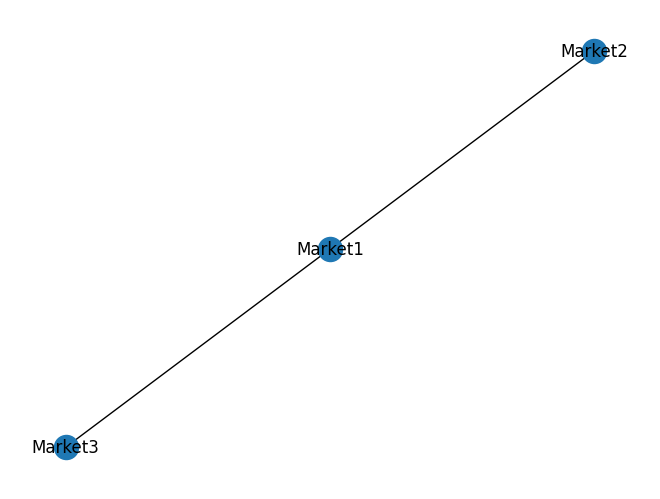

In [ ]:
import networkx as nx

# Example dataset: market locations and distances between them
market_locations = {
    'Market1': {'latitude': 40.7128, 'longitude': -74.0060},
    'Market2': {'latitude': 34.0522, 'longitude': -118.2437},
    'Market3': {'latitude': 41.8781, 'longitude': -87.6298}
}

distances = {
    ('Market1', 'Market2'): 100,  # Example distance between Market1 and Market2
    ('Market1', 'Market3'): 200,  # Example distance between Market1 and Market3
    # Add more distances as needed
}

# Create an empty undirected graph
G = nx.Graph()

# Add nodes to the graph
for market, attrs in market_locations.items():
    G.add_node(market, **attrs)

# Add edges to the graph
for (source, target), distance in distances.items():
    G.add_edge(source, target, distance=distance)

# Visualize the graph
nx.draw(G, with_labels=True)


#**This Graph is according to our dataset**

      Sl no. District Name Market Name Commodity Variety Grade  \
0          1       Bankura      Khatra    Potato   Jyoti   FAQ   
1          2       Bankura      Khatra    Potato   Jyoti   FAQ   
2          3       Bankura      Khatra    Potato   Jyoti   FAQ   
3          4       Bankura      Khatra    Potato   Jyoti   FAQ   
4          5       Bankura      Khatra    Potato   Jyoti   FAQ   
...      ...           ...         ...       ...     ...   ...   
2095     296       Burdwan    Durgapur    Potato   Other   FAQ   
2096     297       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2097     298       Burdwan    Durgapur    Potato   Other   FAQ   
2098     299       Burdwan    Durgapur    Potato   Jyoti   FAQ   
2099     300       Burdwan    Durgapur    Potato   Other   FAQ   

      Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                        2150                     2200   
1                        2150                     2200   
2                        2130    

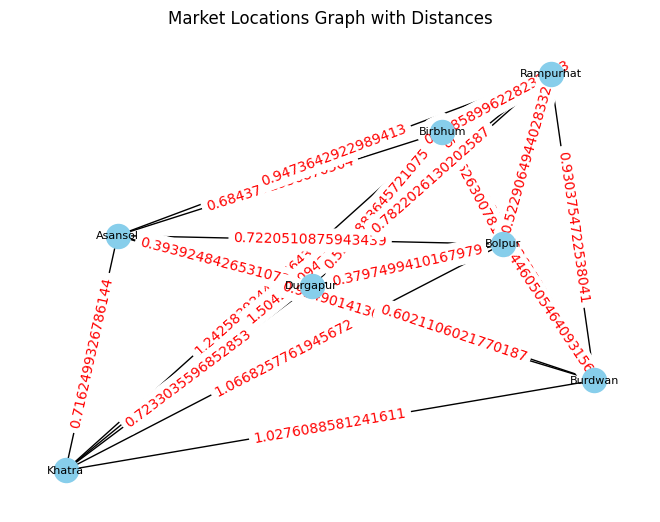

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset

print(df)
# Assuming the dataset has columns 'Market', 'Latitude' and 'Longitude'
# You can adjust this based on your dataset structure
market_locations = df[['Market Name', 'Latitude', 'Longitude']]

# Create an empty graph
G = nx.Graph()

# Add nodes (market locations) to the graph
for index, row in market_locations.iterrows():
    G.add_node(row['Market Name'], pos=(row['Longitude'], row['Latitude']))

# Calculate distance between each pair of nodes and add edges
for u, v in nx.non_edges(G):
    u_pos = G.nodes[u]['pos']
    v_pos = G.nodes[v]['pos']
    distance = ((u_pos[0] - v_pos[0])**2 + (u_pos[1] - v_pos[1])**2)**0.5  # Euclidean distance
    G.add_edge(u, v, weight=distance)

# Plotting
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black')

# Draw edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Market Locations Graph with Distances')
plt.show()


#**GNN MODEL**

In [41]:

# Shuffle the dataframe
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim



df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the dataset



#dataset
#=====================================================
!pip install torch_geometric
import torch_geometric.data as tg_data
from torch_geometric.data import Data as tg_Data
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
#df = pd.read_csv('tomato_prices_dataset.csv')

# Sample a fraction of the dataset
sample_frac = 0.1 # Adjust the fraction as needed
df = df.sample(frac=sample_frac, random_state=42).reset_index(drop=True)

# Preprocessing
label_encoder = LabelEncoder()
df['District Name'] = label_encoder.fit_transform(df['District Name'])
df['Market Name'] = label_encoder.fit_transform(df['Market Name'])
df['Commodity'] = label_encoder.fit_transform(df['Commodity'])
scaler = StandardScaler()
df[['Modal Price (Rs./Quintal)']] = scaler.fit_transform(df[['Modal Price (Rs./Quintal)']])

# Construct graph
edges = np.array(df[['Market Name', 'Market Name']].values.T, dtype=np.int64)
edges = torch.tensor(edges, dtype=torch.long)
prices = torch.tensor(df['Modal Price (Rs./Quintal)'].values, dtype=torch.float)
x = torch.tensor(df[['District Name', 'Latitude', 'Longitude', 'Modal Price (Rs./Quintal)']].values, dtype=torch.float)
data = Data(x=x, edge_index=edges)

# Define GCN model
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.fc(x)
        return x

# Initialize the model
input_dim = x.size(1)
hidden_dim = 32
model = GCN(input_dim, hidden_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out.squeeze(), prices)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted_prices = model(data.x, data.edge_index)

# Calculate MSE
mse = (((predicted_prices - prices) ** 2).mean().item())
print(f"Mean Squared Error: {mse:.4f}")

# Calculate RMSE
rmse = np.sqrt(((predicted_prices - prices) ** 2).mean().item())
print(f"Root Mean Squared Error: {rmse:.4f}")



Epoch [1/100], Loss: 23.3202
Epoch [2/100], Loss: 1.2640
Epoch [3/100], Loss: 13.0426
Epoch [4/100], Loss: 10.1271
Epoch [5/100], Loss: 3.0125
Epoch [6/100], Loss: 0.9898
Epoch [7/100], Loss: 3.1546
Epoch [8/100], Loss: 5.2885
Epoch [9/100], Loss: 4.8140
Epoch [10/100], Loss: 2.9413
Epoch [11/100], Loss: 1.3140
Epoch [12/100], Loss: 0.9389
Epoch [13/100], Loss: 1.7097
Epoch [14/100], Loss: 2.5243
Epoch [15/100], Loss: 2.5636
Epoch [16/100], Loss: 1.9513
Epoch [17/100], Loss: 1.2417
Epoch [18/100], Loss: 0.8848
Epoch [19/100], Loss: 0.9673
Epoch [20/100], Loss: 1.2815
Epoch [21/100], Loss: 1.5460
Epoch [22/100], Loss: 1.5893
Epoch [23/100], Loss: 1.4099
Epoch [24/100], Loss: 1.1310
Epoch [25/100], Loss: 0.9062
Epoch [26/100], Loss: 0.8327
Epoch [27/100], Loss: 0.9072
Epoch [28/100], Loss: 1.0427
Epoch [29/100], Loss: 1.1322
Epoch [30/100], Loss: 1.1166
Epoch [31/100], Loss: 1.0128
Epoch [32/100], Loss: 0.8876
Epoch [33/100], Loss: 0.8072
Epoch [34/100], Loss: 0.7984
Epoch [35/100], Loss

In [ ]:
df